In [1]:
%matplotlib notebook 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    import h5py
try:
    import awkward0 as awkward
except ModuleNotFoundError:
    import awkward

In [3]:
files = {}
kick1 = 0
misslice = 0
stagelengths = [250, 250, 250, 50, 250]
# Stage 0: Simple DD Pretraining
# files['stage0'] = ['13July2021_DirtyDozen_SetVar_20_nodes_500_epochs_0.0001',
#                    '13July2021_DirtyDozen_SetVar_50_nodes_500_epochs_0.0001',
#                    '13July2021_DirtyDozen_SetVar_5to500_nodes_500_epochs_0.0001',
#                    '13July2021_DirtyDozen_SetVar_5to50_nodes_500_epochs_0.0001',
#                    '14July2021_DirtyDozen_SetVar_5to100_nodes_500_epochs_0.0001',
#                    '14July2021_DirtyDozen_SetVar_100_nodes_500_epochs_0.0001']
# kick1 += 500
# misslice += 500

#Stage 0.5: Simple DD Training. Not used in Further Training
# files['stage0.5'] = ['07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_it0pretrain_250_epochs_1e-05',
#                     '07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_5to50_nodes_it0pretrain_250_epochs_1e-05',
#                     '07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_50_nodes_it0pretrain_250_epochs_1e-05',
#                     #'07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_5to100_it0pretrain_nodes_250_epochs_1e-05',
#                     '07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_100_nodes_it0pretrain_250_epochs_1e-05',
#                     '07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_5to500_nodes_it0pretrain_250_epochs_1e-05']

# #Stage 1: Weight Freezing
# files['stage1'] = ['16July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_it0pretrain_250_epochs_1e-05',
#                    '16July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to50_nodes_it0pretrain_250_epochs_1e-05',
#                    '16July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_50_nodes_it0pretrain_250_epochs_1e-05',
#                    '17July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to100_nodes_it0pretrain_250_epochs_1e-05',
#                    '16July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_100_nodes_it0pretrain_250_epochs_1e-05',
#                    '17July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to500_nodes_it0pretrain_250_epochs_1e-05']
# kick1 += 250
# misslice  += 250

# #Stage 2: DD+ Post Weight Freezing
# files['stage2'] = ['19July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_it0pretrain_it29prefreeze_250_epochs_1e-05',
#                    '19July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to50_nodes_it0pretrain_it29prefreeze_250_epochs_1e-05',
#                    '19July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_50_nodes_it0pretrain_it29prefreeze_250_epochs_1e-05',
#                    '20July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to100_nodes_it0pretrain_it29prefreeze_250_epochs_1e-05',
#                    '20July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_100_nodes_it0pretrain_it29prefreeze_250_epochs_1e-05',
#                    '20July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to500_nodes_it0pretrain_250_epochs_1e-05']
# kick1 += 250
# misslice  += 250

# #Stage 2.5: Learning Rate Kick
# files['stage2.5'] = ['22July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_unstick_attpt_50_epochs_0.0001',
#                      '22July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to100_nodes_unstick_attpt_50_epochs_0.0001']
#                     #'28July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to500_nodes_unstick_attpt_50_epochs_1e-05']
#                     #Failed to kick, so commented out and not used for further training

# #Stage 2.75: Freezing Kick
# files['stage2.75'] = ['28July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to500_nodes_unstick_attpt2_50_epochs_1e-05']
# misslice += 50

# #Stage 3: Continued Standard DD+ Training
# files['stage3'] = ['22July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_it29pretrain_250_epochs_1e-05',
#                    '22July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to50_nodes_it29pretrain_250_epochs_1e-05',
#                    '22July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_50_nodes_it29pretrain_250_epochs_1e-05',
#                    '22July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to100_nodes_it29pretrain_250_epochs_1e-05',
#                    '22July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_100_nodes_it29pretrain_250_epochs_1e-05',
#                    '28July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to500_nodes_it29pretrain_250_epochs_1e-05']
# misslice += 250

# #Stage 4: Continued Standard DD+ Training
# files['stage4'] = ['23July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_it29pretrain_250_epochs_1e-05',
#                      '23July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to50_nodes_it29pretrain_250_epochs_1e-05',
#                      '23July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_50_nodes_it29pretrain_250_epochs_1e-05',
#                      '23July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to100_nodes_it29pretrain_250_epochs_1e-05',
#                      '23July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_100_nodes_it29pretrain_250_epochs_1e-05',
#                      '28July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to500_nodes_it29pretrain2_250_epochs_1e-05']
# misslice += 250

# #Stage 5: Continued Standard DD+ Training
# files['stage5'] = ['26July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_it29pretrain_250_epochs_1e-05',
#                    '28July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to50_nodes_it29pretrain_250_epochs_1e-05',
#                    '28July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_50_nodes_it29pretrain_250_epochs_1e-05', 
#                    '28July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to100_nodes_it29pretrain_250_epochs_1e-05',
#                    '28July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_100_nodes_it29pretrain_250_epochs_1e-05',
#                    '29July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to500_nodes_it29pretrain_250_epochs_1e-05']
# misslice += 250

# #Stage 6: Continued Standard DD+ Training
# files['stage6'] = ['28July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_it29pretrain2_250_epochs_1e-05',
#                    '28July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to50_nodes_it29pretrain2_250_epochs_1e-05',
#                    '28July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_50_nodes_it29pretrain2_250_epochs_1e-05',
#                     '29July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to100_nodes_it29pretrain_250_epochs_1e-05',
#                     '29July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_100_nodes_it29pretrain_250_epochs_1e-05' ]

# #Stage 6.5: Standard DD+ Training w/ Expanded Dataset
# files['stage6.5'] = ['29July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to500_nodes_exp_trainset_250_epochs_1e-05' ]
# misslice += 250

#Stage 7: Continued Standard DD+ Training
files['stage7'] = ['28July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_it29pretrain2_250_epochs_1e-05',
                   '28July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to50_nodes_it29pretrain2_250_epochs_1e-05',
                   '28July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_50_nodes_it29pretrain2_250_epochs_1e-05']

#Stage 7.5: Standard DD+ Training w/ Expanded Dataset (False, was sliced)
files['stage7.5'] = ['29July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_100_nodes_exp_trainset2_250_epochs_1e-05',
                     '29July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to500_nodes_exp_trainset2_250_epochs_1e-05']



#Stage 8: Sliceless Expanded Dataset
files['stage8'] = ['29July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_sliceless_250_epochs_1e-05',
                      #'30July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to50_nodes_sliceless_250_epochs_1e-05',
                      #'01August2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to50_nodes_sliceless_finisher_175_epochs_1e-05',
                      #'02August2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to50_nodes_sliceless_finisher_127_epochs_1e-05',
                      '02August2021_DDplus_loss_Ba_iter29_floatAll_SetVar_50_nodes_sliceless_250_epochs_1e-05',
                      '29July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to100_nodes_sliceless_250_epochs_1e-05',]
                      #'30July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_100_nodes_sliceless_250_epochs_1e-05',
                      #'01August2021_DDplus_loss_Ba_iter29_floatAll_SetVar_100_nodes_sliceless_finisher_216_epochs_1e-05',
                      #'02August2021_DDplus_loss_Ba_iter29_floatAll_SetVar_100_nodes_sliceless_finisher_167_epochs_1e-05',
                      #'01August2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to500_nodes_sliceless_finisher_29_epochs_1e-05',
                      #'29July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to500_nodes_sliceless_250_epochs_1e-05',
                      #'01August2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to500_nodes_sliceless_finisher_29_epochs_1e-05']


#Stage 9: Standard DD+ Training w/ Expanded Dataset, LR = 1e-6
files['stageidk'] = ['04August2021_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_exp_trainset_slow_100_epochs_1e-06',
                     '04August2021_DDplus_loss_Ba_iter29_floatAll_SetVar_50_nodes_exp_trainset_slow_100_epochs_1e-06',
                     '04August2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to100_nodes_exp_trainset_slow_100_epochs_1e-06']

# #Stage 9: Standard DD+ Training w/ Expanded Dataset, LR = 1e-6
# files['stageidk'] = ['05August2021_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_exp_trainset_slow_250_epochs_1e-06',
#                      '07August2021_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_exp_trainset_slow_finisher_103_epochs_1e-06',
#                      '08August2021_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_exp_trainset_slow_finisher2_85_epochs_1e-06',
#                      '05August2021_DDplus_loss_Ba_iter29_floatAll_SetVar_50_node_exp_trainset_slow_250_epochs_1e-06',
#                      '07August2021_DDplus_loss_Ba_iter29_floatAll_SetVar_50_node_exp_trainset_slow_finisher_95_epochs_1e-06',
#                      '08August2021_DDplus_loss_Ba_iter29_floatAll_SetVar_50_node_exp_trainset_slow_finisher2_71_epochs_1e-06',
#                      '05August2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to100_nodes_exp_trainset_slow_250_epochs_1e-06',
#                      '07August2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to100_nodes_exp_trainset_slow_250_epochs_1e-06',
#                      '08August2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to100_nodes_exp_trainset_slow_finisher2_47_epochs_1e-06']



In [4]:
legender = ['20 Nodes', '5 to 50 Nodes', '50 Nodes', '5 to 100 Nodes', '100 Nodes', '5 to 500 Nodes']
archs = ['20_node', '5to50_node', '50_node', '5to100_node', '100_node', '5to500_node']
data = {}
for arch in archs:
    data[arch] = {'cost':np.array([]), 'val':np.array([])}
for stage in files:
    for n in range(len(files[stage])):
        folder = files[stage][n]
        fullpath = 'jgo_files/' + folder + '/' + folder + '_stats.hdf5'
        index = folder[folder.index('SetVar')+7:folder.index('node')+4]
        with h5py.File(fullpath, mode="r") as f:
            columns = []
            for i in np.asarray(f['results']['axis0']):
                columns.append(i.decode('UTF-8'))
            holder = pd.DataFrame(np.asarray(f['results']['block0_values']), columns = columns)
            data[index]['cost'] = np.concatenate((data[index]['cost'], holder['cost'].array))
            data[index]['val'] = np.concatenate((data[index]['val'], holder['val'].array))
for arch in archs:
    data[arch]['epochs'] = np.array([i for i in range(len(data[arch]['cost']))])
    if not(arch != '20_node') and not(arch != '5to100_node') and not(arch != '5to500_node'):
        print(arch)
        data[arch]['epochs'][data[arch]['epochs'] > kick1] = data[arch]['epochs'][data[arch]['epochs'] > kick1] + 50
    if not(arch != '5to100_node'):
        print(arch)
        data[arch]['epochs'][data[arch]['epochs'] > misslice] = data[arch]['epochs'][data[arch]['epochs'] > misslice] + 250

5to100_node


<IPython.core.display.Javascript object>


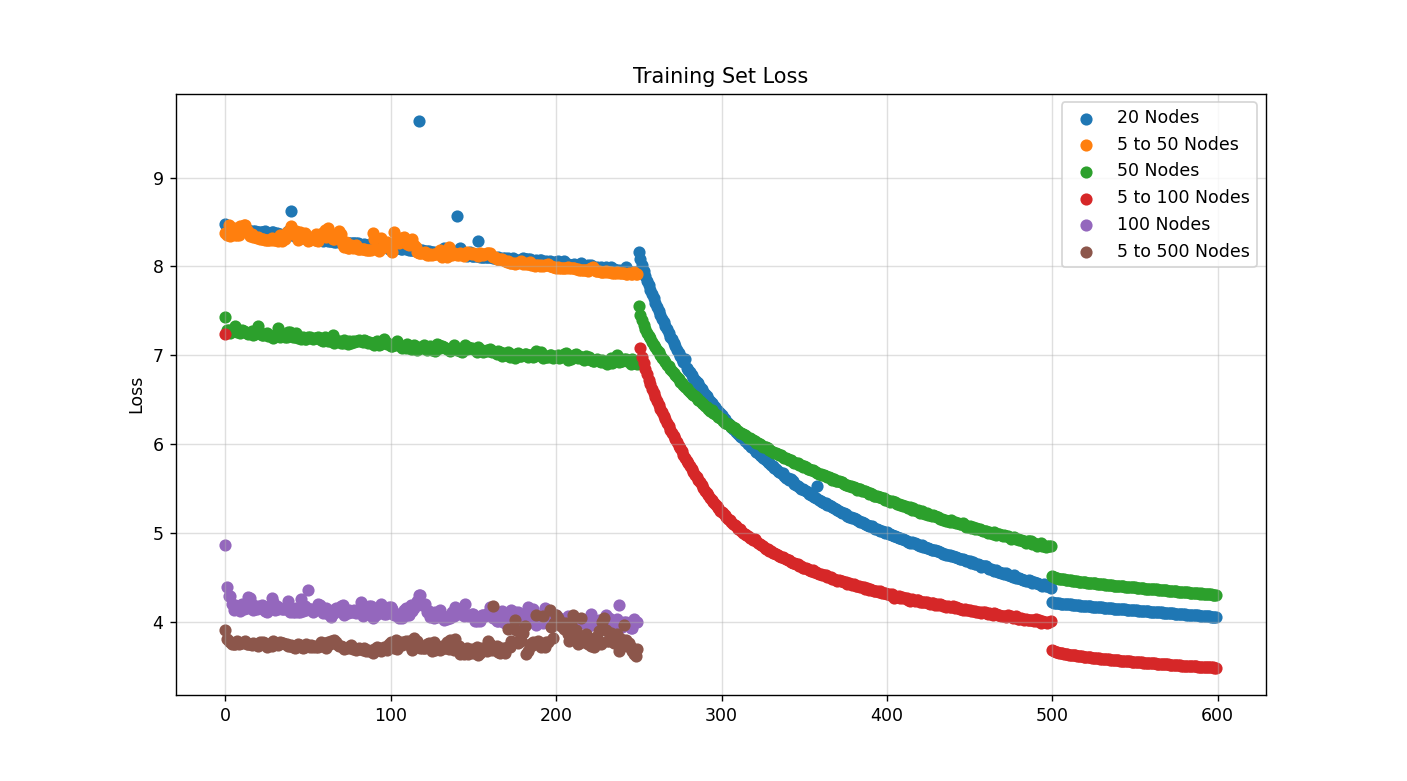

In [5]:
fig = plt.figure(figsize = (9, 5))
front = 0
max = 0
min = 500
far = 0
for arch in archs:
    x = data[arch]['epochs'][front:]
    y = data[arch]['cost'][front:]
    x = x[y < 20]
    y = y[y < 20]
    if max < np.max(y):
        max = np.max(y)
    if min > np.min(y):
        min = np.min(y)
    plt.scatter(x, y)
pos = 0
# for stage in stagelengths:
#     pos = pos + stage
#     plt.fillbetween([0, pos], [min], [max])
plt.legend(legender)
plt.grid(True, zorder = 0, alpha = .4)
plt.title('Training Set Loss')
plt.ylabel('Loss')
plt.show()

<IPython.core.display.Javascript object>


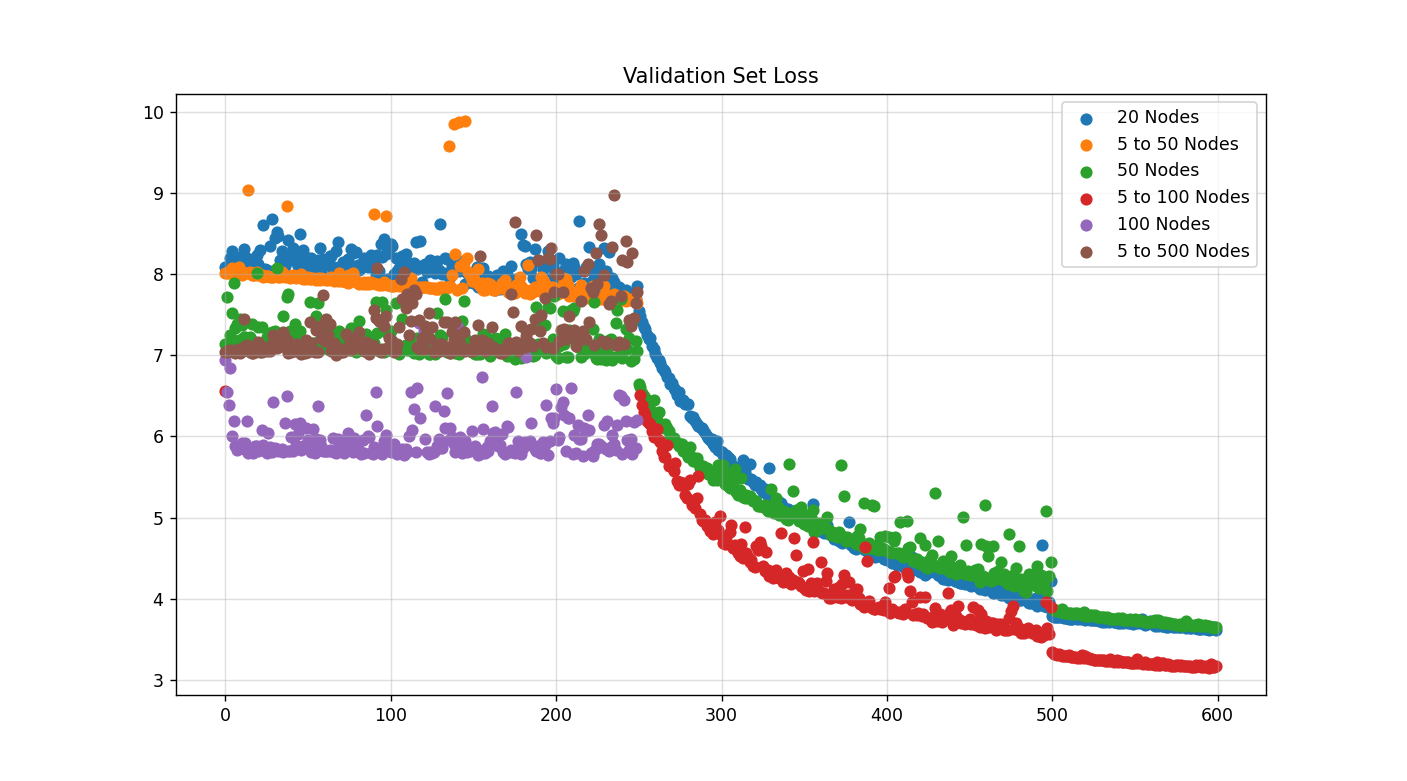

In [6]:
fig = plt.figure(figsize = (9, 5))
front = 0
for arch in archs:
    plt.scatter(data[arch]['epochs'][front:], data[arch]['val'][front:])
plt.legend(legender)
plt.grid(True, zorder = 0, alpha = .4)
plt.title('Validation Set Loss')
#plt.xlabel('Epoch No.')
plt.show()

<IPython.core.display.Javascript object>


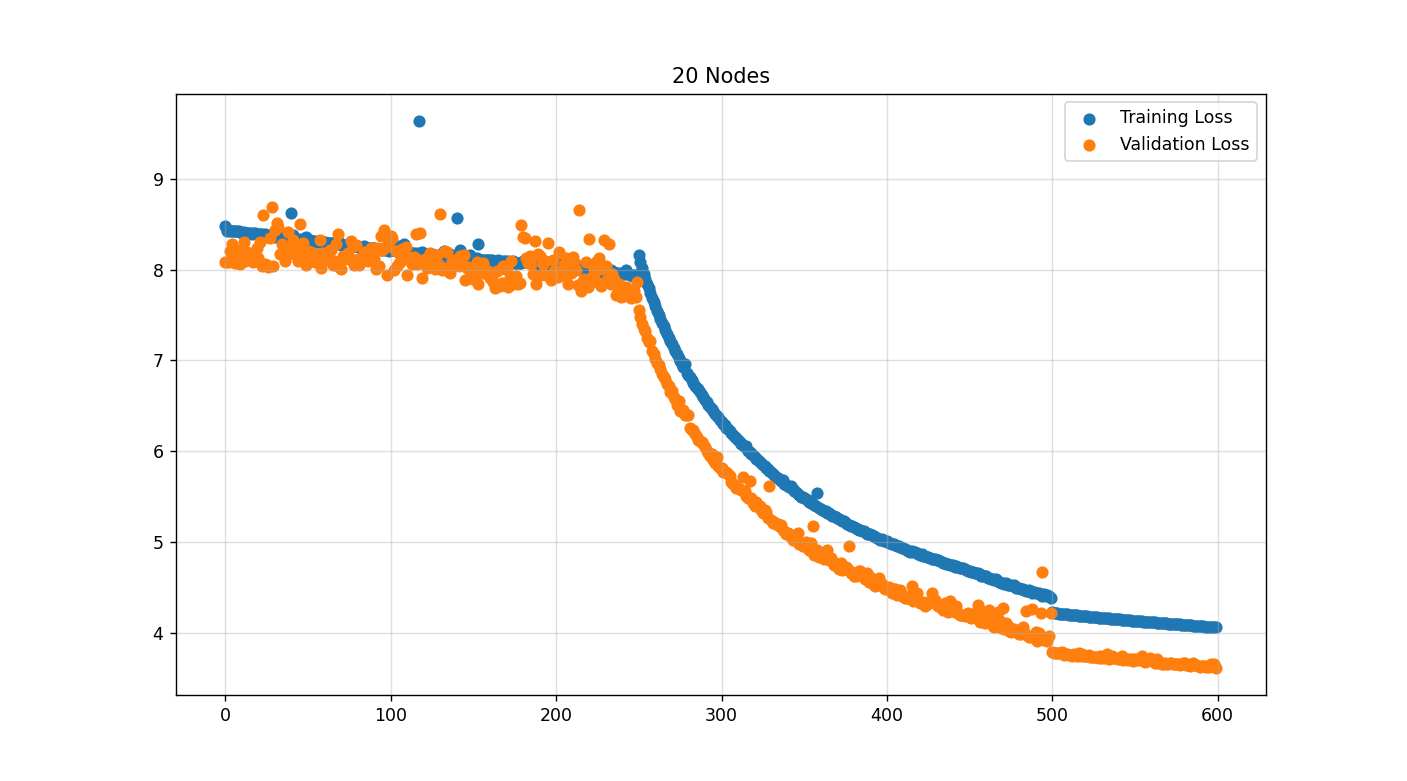

<IPython.core.display.Javascript object>


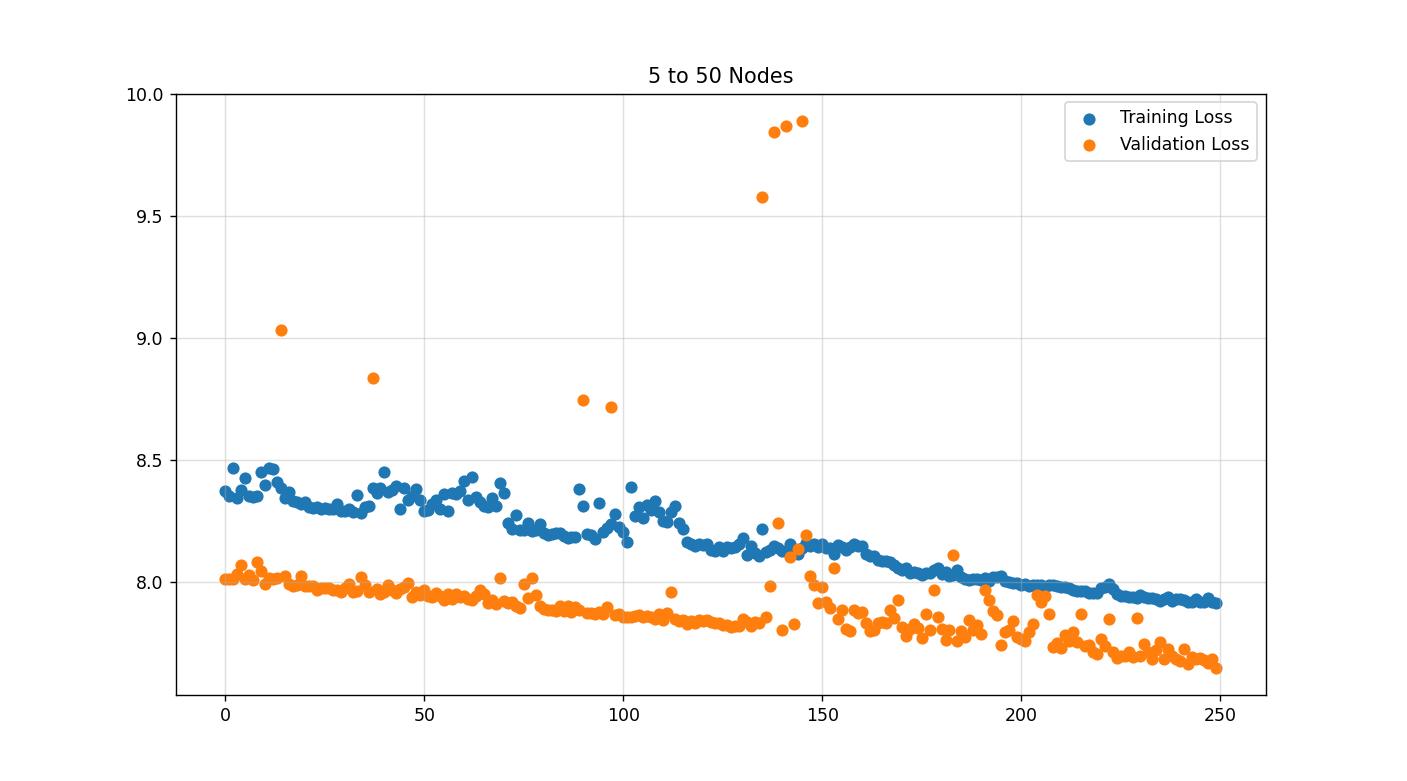

<IPython.core.display.Javascript object>


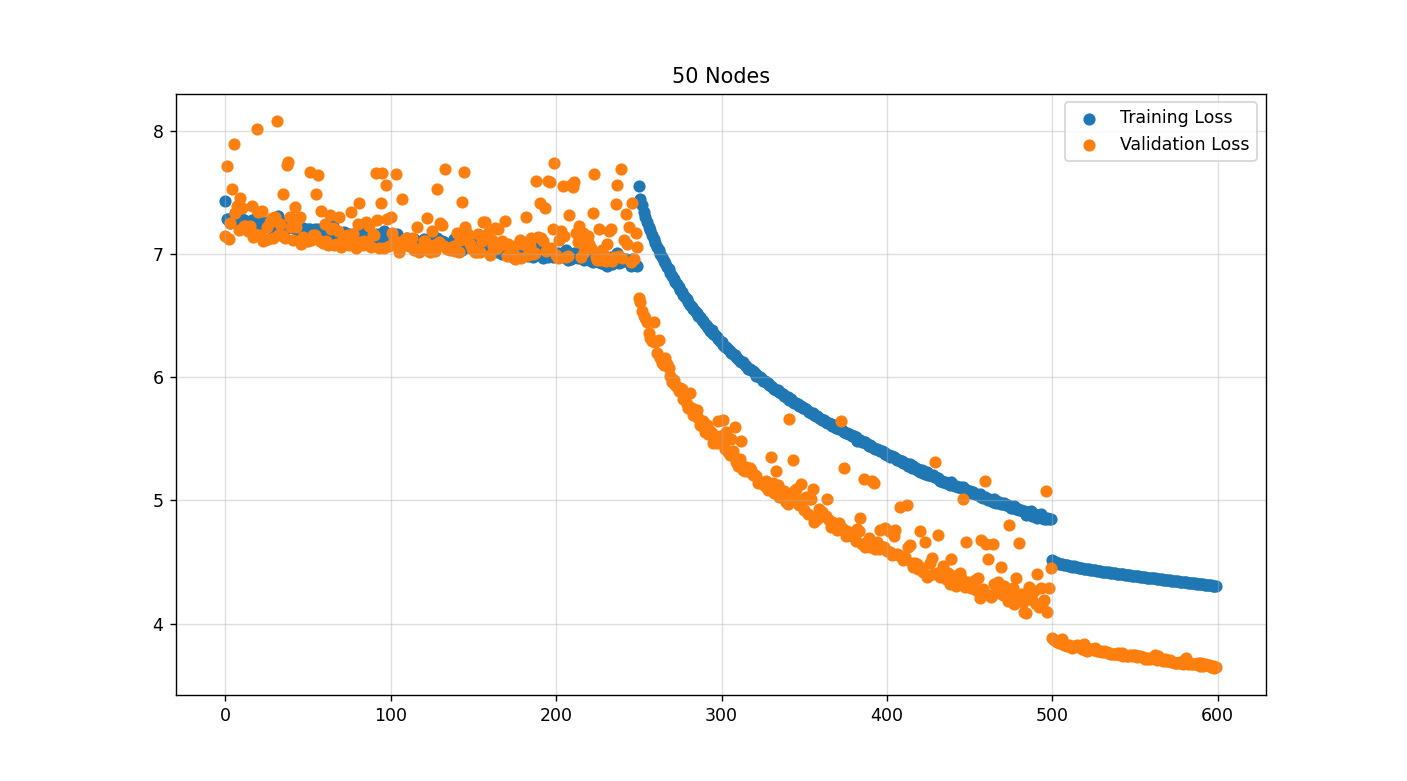

<IPython.core.display.Javascript object>


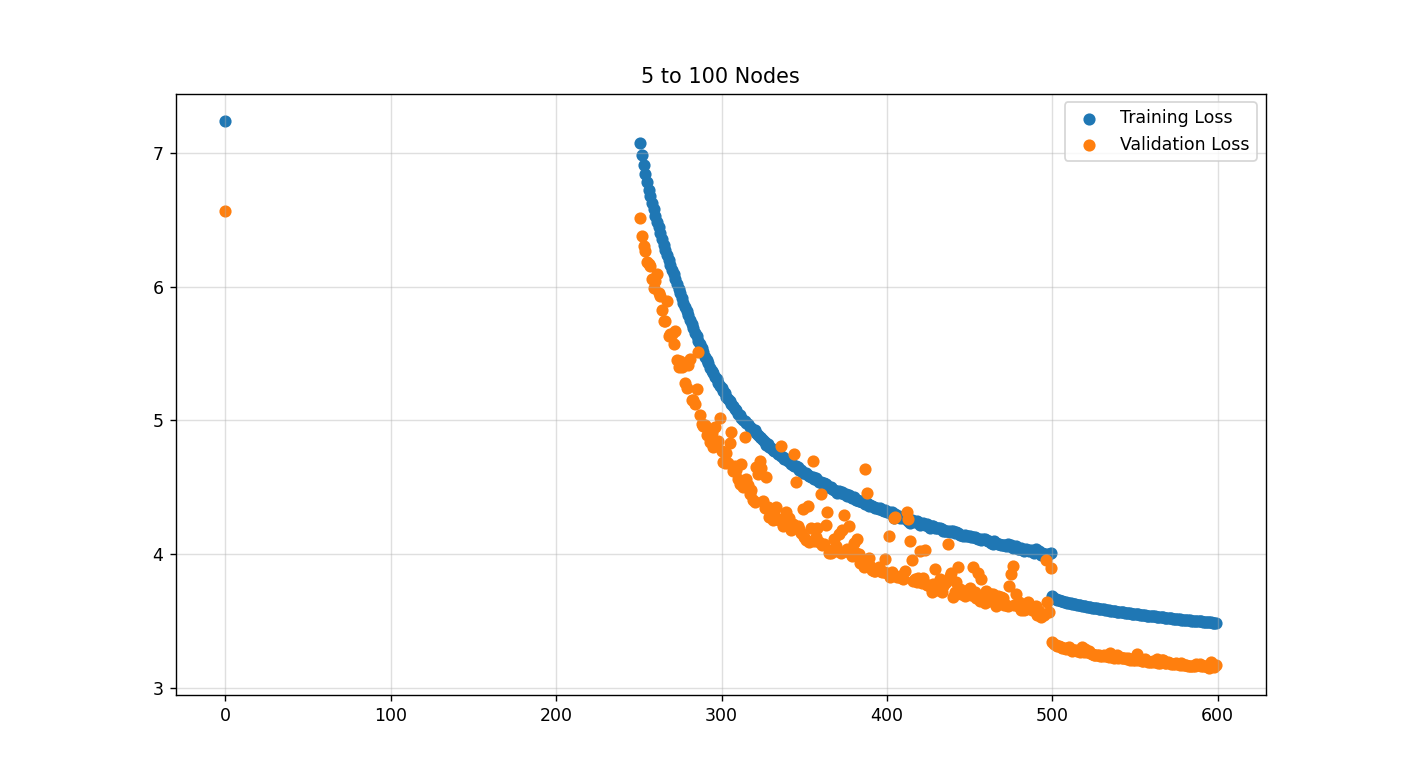

<IPython.core.display.Javascript object>


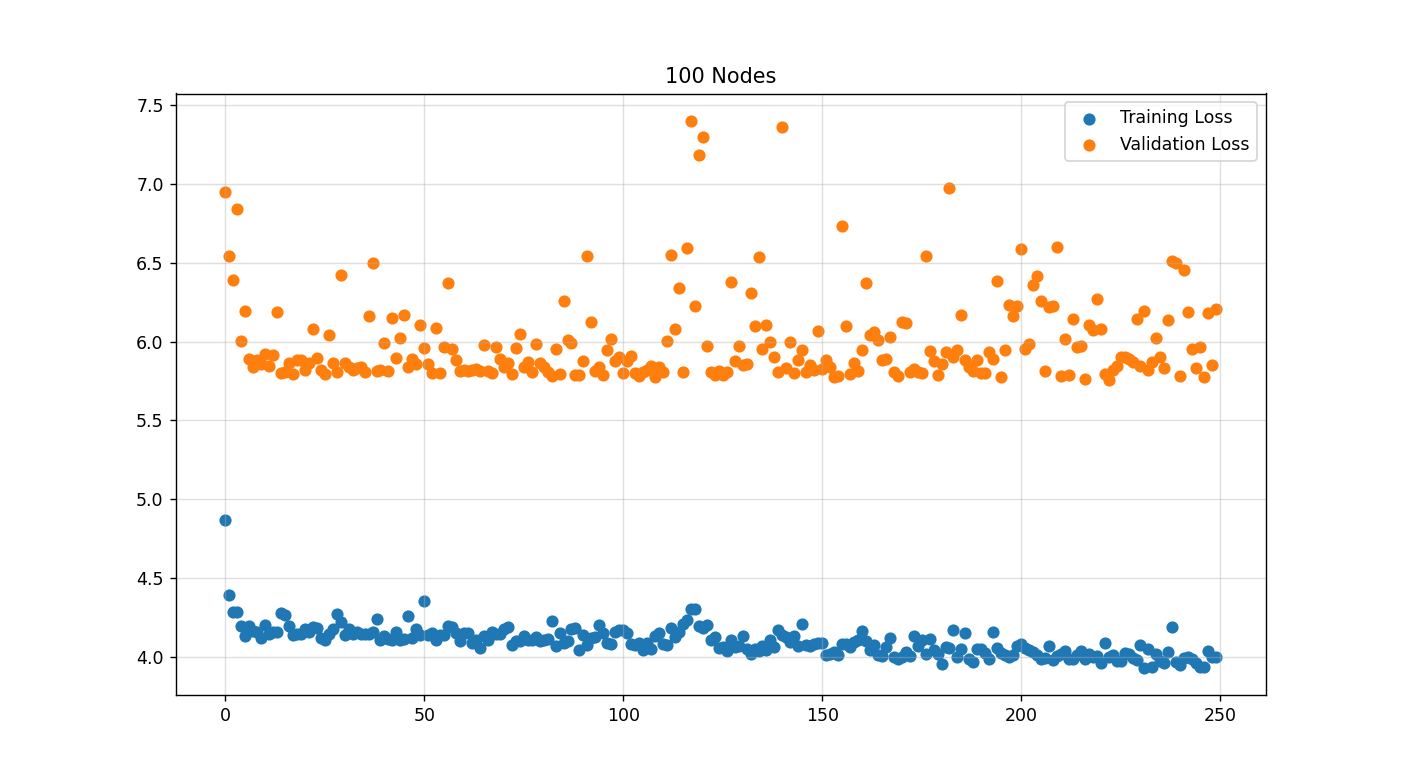

<IPython.core.display.Javascript object>


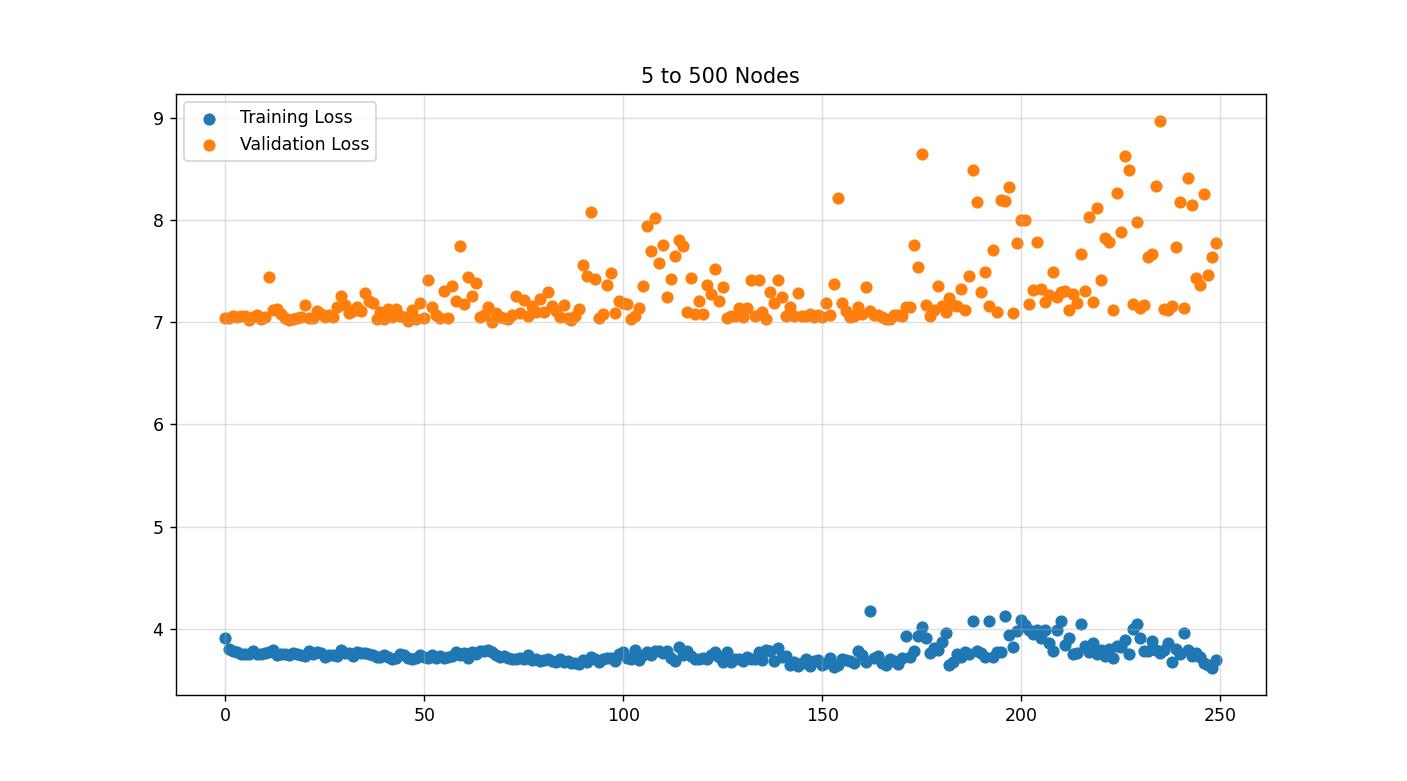

In [7]:
front = 0
for i in range(len(archs)):
    fig = plt.figure(figsize = (9, 5))
    arch = [a for a in archs]
    plt.scatter(data[arch[i]]['epochs'][front:], data[arch[i]]['cost'][front:])
    plt.scatter(data[arch[i]]['epochs'][front:], data[arch[i]]['val'][front:])
    plt.title(legender[i])
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.grid(True, zorder = 0, alpha = .4)
    plt.show()

In [8]:
print('Final States:')
print()
for arch in archs:
    print(arch)
    print('Train Loss:', str(data[arch]['cost'][len(data[arch]['cost'])-1]))
    print('Test Loss:', str(data[arch]['val'][len(data[arch]['val'])-1]))
    print()

Final States:

20_node
Train Loss: 4.058829940305437
Test Loss: 3.613535120083501

5to50_node
Train Loss: 7.913409524662479
Test Loss: 7.649642573800056

50_node
Train Loss: 4.3042722474234445
Test Loss: 3.6507427075419563

5to100_node
Train Loss: 3.485182526724679
Test Loss: 3.170292285303719

100_node
Train Loss: 3.997256954764105
Test Loss: 6.207868433302375

5to500_node
Train Loss: 3.6945058259235064
Test Loss: 7.774490365556851



In [9]:
fullpath = 'dataAA/20K_POCA_kernel_evts_200926.h5'
with h5py.File(fullpath, mode="r") as f:
    for i in f:
        print(i)


Xmax
Ymax
kernel
major_axis_x
major_axis_y
major_axis_z
minor_axis1_x
minor_axis1_y
minor_axis1_z
minor_axis2_x
minor_axis2_y
minor_axis2_z
poca_KDE_A
poca_KDE_A_xMax
poca_KDE_A_yMax
poca_KDE_B
poca_KDE_B_xMax
poca_KDE_B_yMax
poca_x
poca_y
poca_z
pv
pv_cat
pv_loc
pv_loc_x
pv_loc_y
pv_ntracks
pv_other
recon_tx
recon_ty
recon_x
recon_y
recon_z
sv
sv_cat
sv_loc
sv_loc_x
sv_loc_y
sv_ntracks
sv_other
